In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [7]:
insurance = pd.read_csv('Medical_insurance_dataset.csv')
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [8]:
insurance.drop(["User ID"], axis = 1, inplace = True)
insurance

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
...,...,...,...,...
395,Female,46,41000,purchased
396,Male,51,23000,purchased
397,Female,50,20000,purchased
398,Male,36,33000,not-purchased


In [9]:
insurance.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.6+ KB


In [11]:
insurance.shape


(400, 4)

In [12]:
y = insurance['Purchased']
y

0      not-purchased
1      not-purchased
2      not-purchased
3      not-purchased
4      not-purchased
           ...      
395        purchased
396        purchased
397        purchased
398    not-purchased
399        purchased
Name: Purchased, Length: 400, dtype: object

In [66]:
X = insurance.drop(['Purchased'], axis = 1)
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


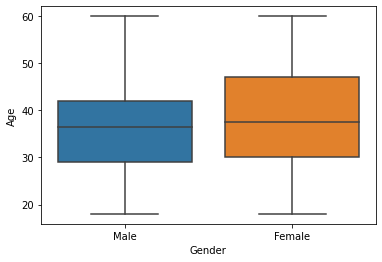

In [67]:
sns.boxplot(x = "Gender", y = "Age", data = insurance)

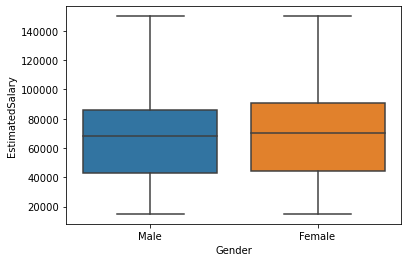

In [68]:
sns.boxplot(x = "Gender", y = "EstimatedSalary", data = insurance)

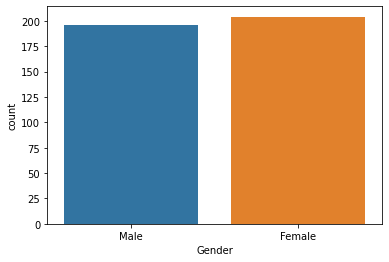

In [69]:
sns.countplot(x = "Gender", data = insurance)

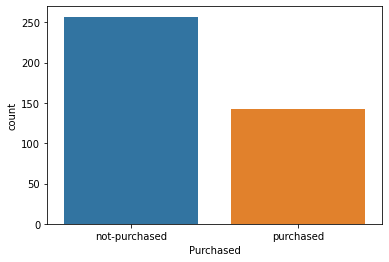

In [70]:
sns.countplot(x = "Purchased", data = insurance)

In [71]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [72]:
X = insurance.drop(["Purchased"], axis = "columns")
y = insurance["Purchased"]

In [73]:
X = pd.get_dummies(X)
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)  

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
Logisticmodel = LogisticRegression()

Logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [81]:
Logistic_prediction = Logisticmodel.predict(X_test)

In [82]:
Logistic_prediction

array(['not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', 'not-purchased', 'not-purchased', 'not-purchased',
       'not-purchased', '

In [83]:
print(Logisticmodel.score(X_train,y_train))
print(Logisticmodel.score(X_test,y_test))

0.6375
0.6625


In [84]:
metrics.accuracy_score(y_test, Logistic_prediction)

0.6625